# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
image_shape_valid = X_valid.shape[1:]
image_shape_test = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len( set(y_train) | set(y_test) )

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Train image shape =", image_shape)
print("Valid image shape =", image_shape_valid)
print("Valid image shape =", image_shape_test)
print("Number of classes =", n_classes)
print("% of validation examples: {:2.2f}%".format((y_valid.shape[0]/(n_train))*100.0))

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Train image shape = (32, 32, 3)
Valid image shape = (32, 32, 3)
Valid image shape = (32, 32, 3)
Number of classes = 43
% of validation examples: 12.67%


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Read input file and create a dictionary from it

import csv
def names_from_csv():
    
    sign_dict ={}                          # Sign dictionary
    
    with open('signnames.csv') as inFile:
        reader = csv.reader(inFile)        
        next(reader)                       # Skip the first row, file header
        
        for row in reader:
            label_index = int(row[0])
            sign_dict[label_index] = row[1]
    return sign_dict

traffic_signs_dict = names_from_csv()
#print(traffic_signs_dict)

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
### Visualization function

def displayImages(images, labels, qty):
    n_row = 11        # Number of row in the sub-plot grid
    n_col = 4         # Number of columns in the sub-plot grid
    fig_w = 3*n_col   # Figure width size in pixels
    fig_h = 3*n_row   # Figure height size in pixels

    fig = plt.figure(figsize=(fig_w + 5, fig_h + 5))     # Set image size

    for index in range(0, qty):                    # Create an iterator of size (n_row x n_col)
        axis = fig.add_subplot(n_row, n_col, index+1)    # Set axis where the image will be shown
        axis.axis('off')
        image = images[np.argwhere(labels==index)[5][0]]
        axis.imshow(image)
        axis.text(0, -2, str(traffic_signs_dict[index]),
                 fontsize=12, 
                 color='k',
                 )

    plt.show()   
    plt.close('all')    # Closing all images

Training Images, 12 off


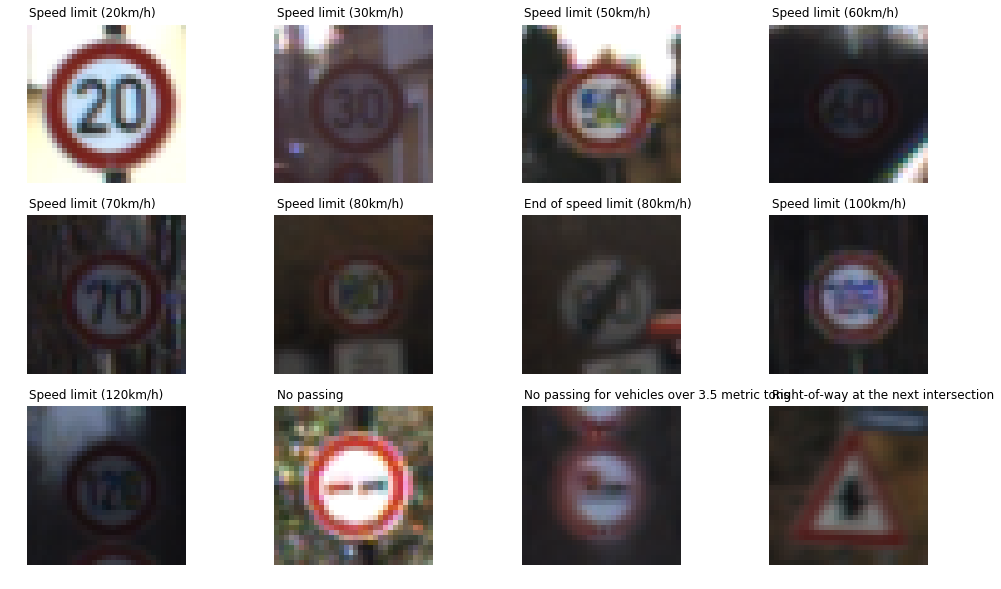

In [6]:
### Visualization Training images, one per category
print("Training Images, 12 off")
displayImages(X_train, y_train, 12)

Training Images, 12 off


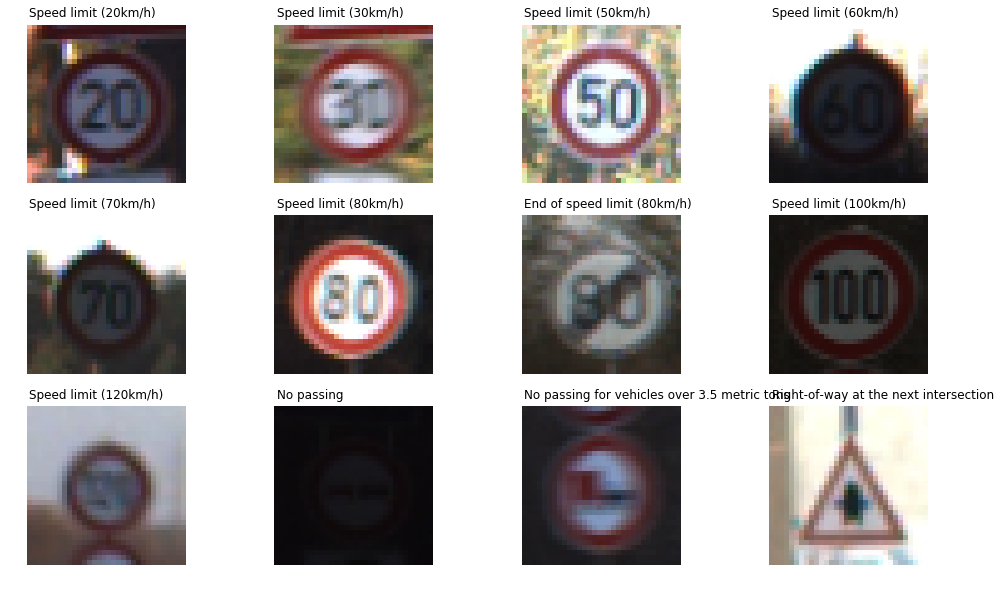

In [7]:
### Visualization Testing images, one per category
print("Training Images, 12 off")
displayImages(X_test, y_test, 12)

Validation Images, 12 off


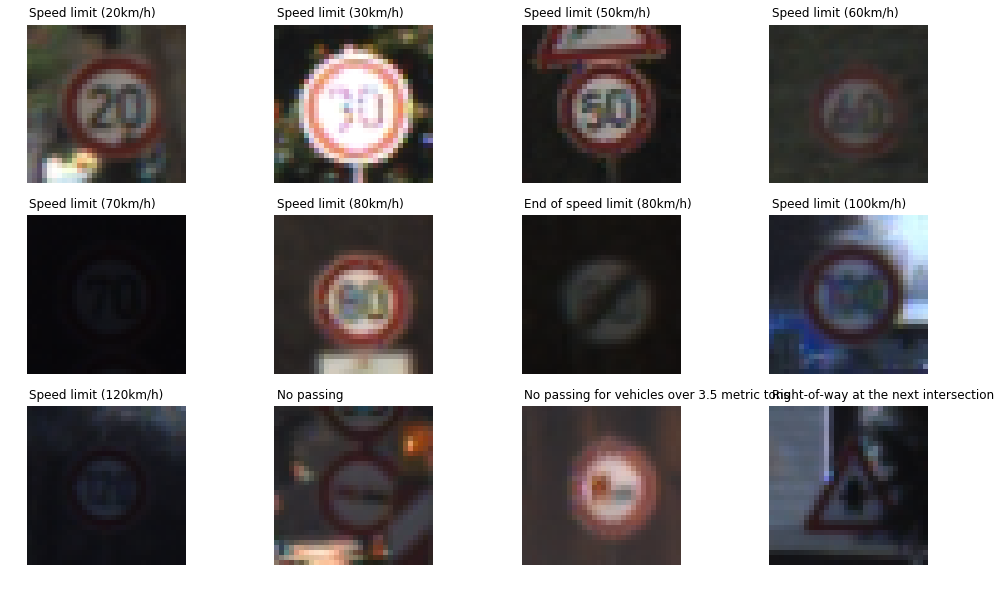

In [8]:
### Visualization Validation images, one per category
print("Validation Images, 12 off")
displayImages(X_valid, y_valid, 12)

In [9]:
### Funtion to print number of images per category

def printDataTable(DataFrame_var):
    """Print a table from the input dataframe"""
    print("ClassId  SignName \t\t\t\t\t\t Counts")
    print("="*73)                                    # Print 73 time = to draw a double line

    for index, row in df.iterrows():
        print("{0:^8} {1:<55} {2}". 
              format(row['ClassId'],row['SignName'], row['Counts']))
        if index == 0:
            continue
        elif (index+1)%4 == 0:
            print("-"*73)                             # Print 73 time - to draw a single line


In [10]:
### Printing Training data summary                        
import pandas as pd

data_pd = pd.read_csv('signnames.csv')  # Read in labels information

_, y_train_counts = np.unique(y_train, return_counts = True) # Count imgs. in each category
data_pd['Counts'] = y_train_counts                                # Append the num. of imgs. to the obj. 
df = pd.DataFrame(data_pd)                                    # Frame data

print("+------------------------+")
print("| Train dataset overview |")
print("+------------------------+")
printDataTable(df)

+------------------------+
| Train dataset overview |
+------------------------+
ClassId  SignName 						 Counts
   0     Speed limit (20km/h)                                    180
   1     Speed limit (30km/h)                                    1980
   2     Speed limit (50km/h)                                    2010
   3     Speed limit (60km/h)                                    1260
-------------------------------------------------------------------------
   4     Speed limit (70km/h)                                    1770
   5     Speed limit (80km/h)                                    1650
   6     End of speed limit (80km/h)                             360
   7     Speed limit (100km/h)                                   1290
-------------------------------------------------------------------------
   8     Speed limit (120km/h)                                   1260
   9     No passing                                              1320
   10    No passing for vehicles over 3.5

In [11]:
### Printing Testing data summary  
_, y_test_counts = np.unique(y_test, return_counts = True)  # Count imgs. in each category
data_pd['Counts'] = y_test_counts                            # Append the num. of imgs. to the obj. 
df = pd.DataFrame(data_pd)                                    # Frame data

print("+-----------------------+")
print("| Test dataset overview |")
print("+-----------------------+")
printDataTable(df)

+-----------------------+
| Test dataset overview |
+-----------------------+
ClassId  SignName 						 Counts
   0     Speed limit (20km/h)                                    60
   1     Speed limit (30km/h)                                    720
   2     Speed limit (50km/h)                                    750
   3     Speed limit (60km/h)                                    450
-------------------------------------------------------------------------
   4     Speed limit (70km/h)                                    660
   5     Speed limit (80km/h)                                    630
   6     End of speed limit (80km/h)                             150
   7     Speed limit (100km/h)                                   450
-------------------------------------------------------------------------
   8     Speed limit (120km/h)                                   450
   9     No passing                                              480
   10    No passing for vehicles over 3.5 metric tons

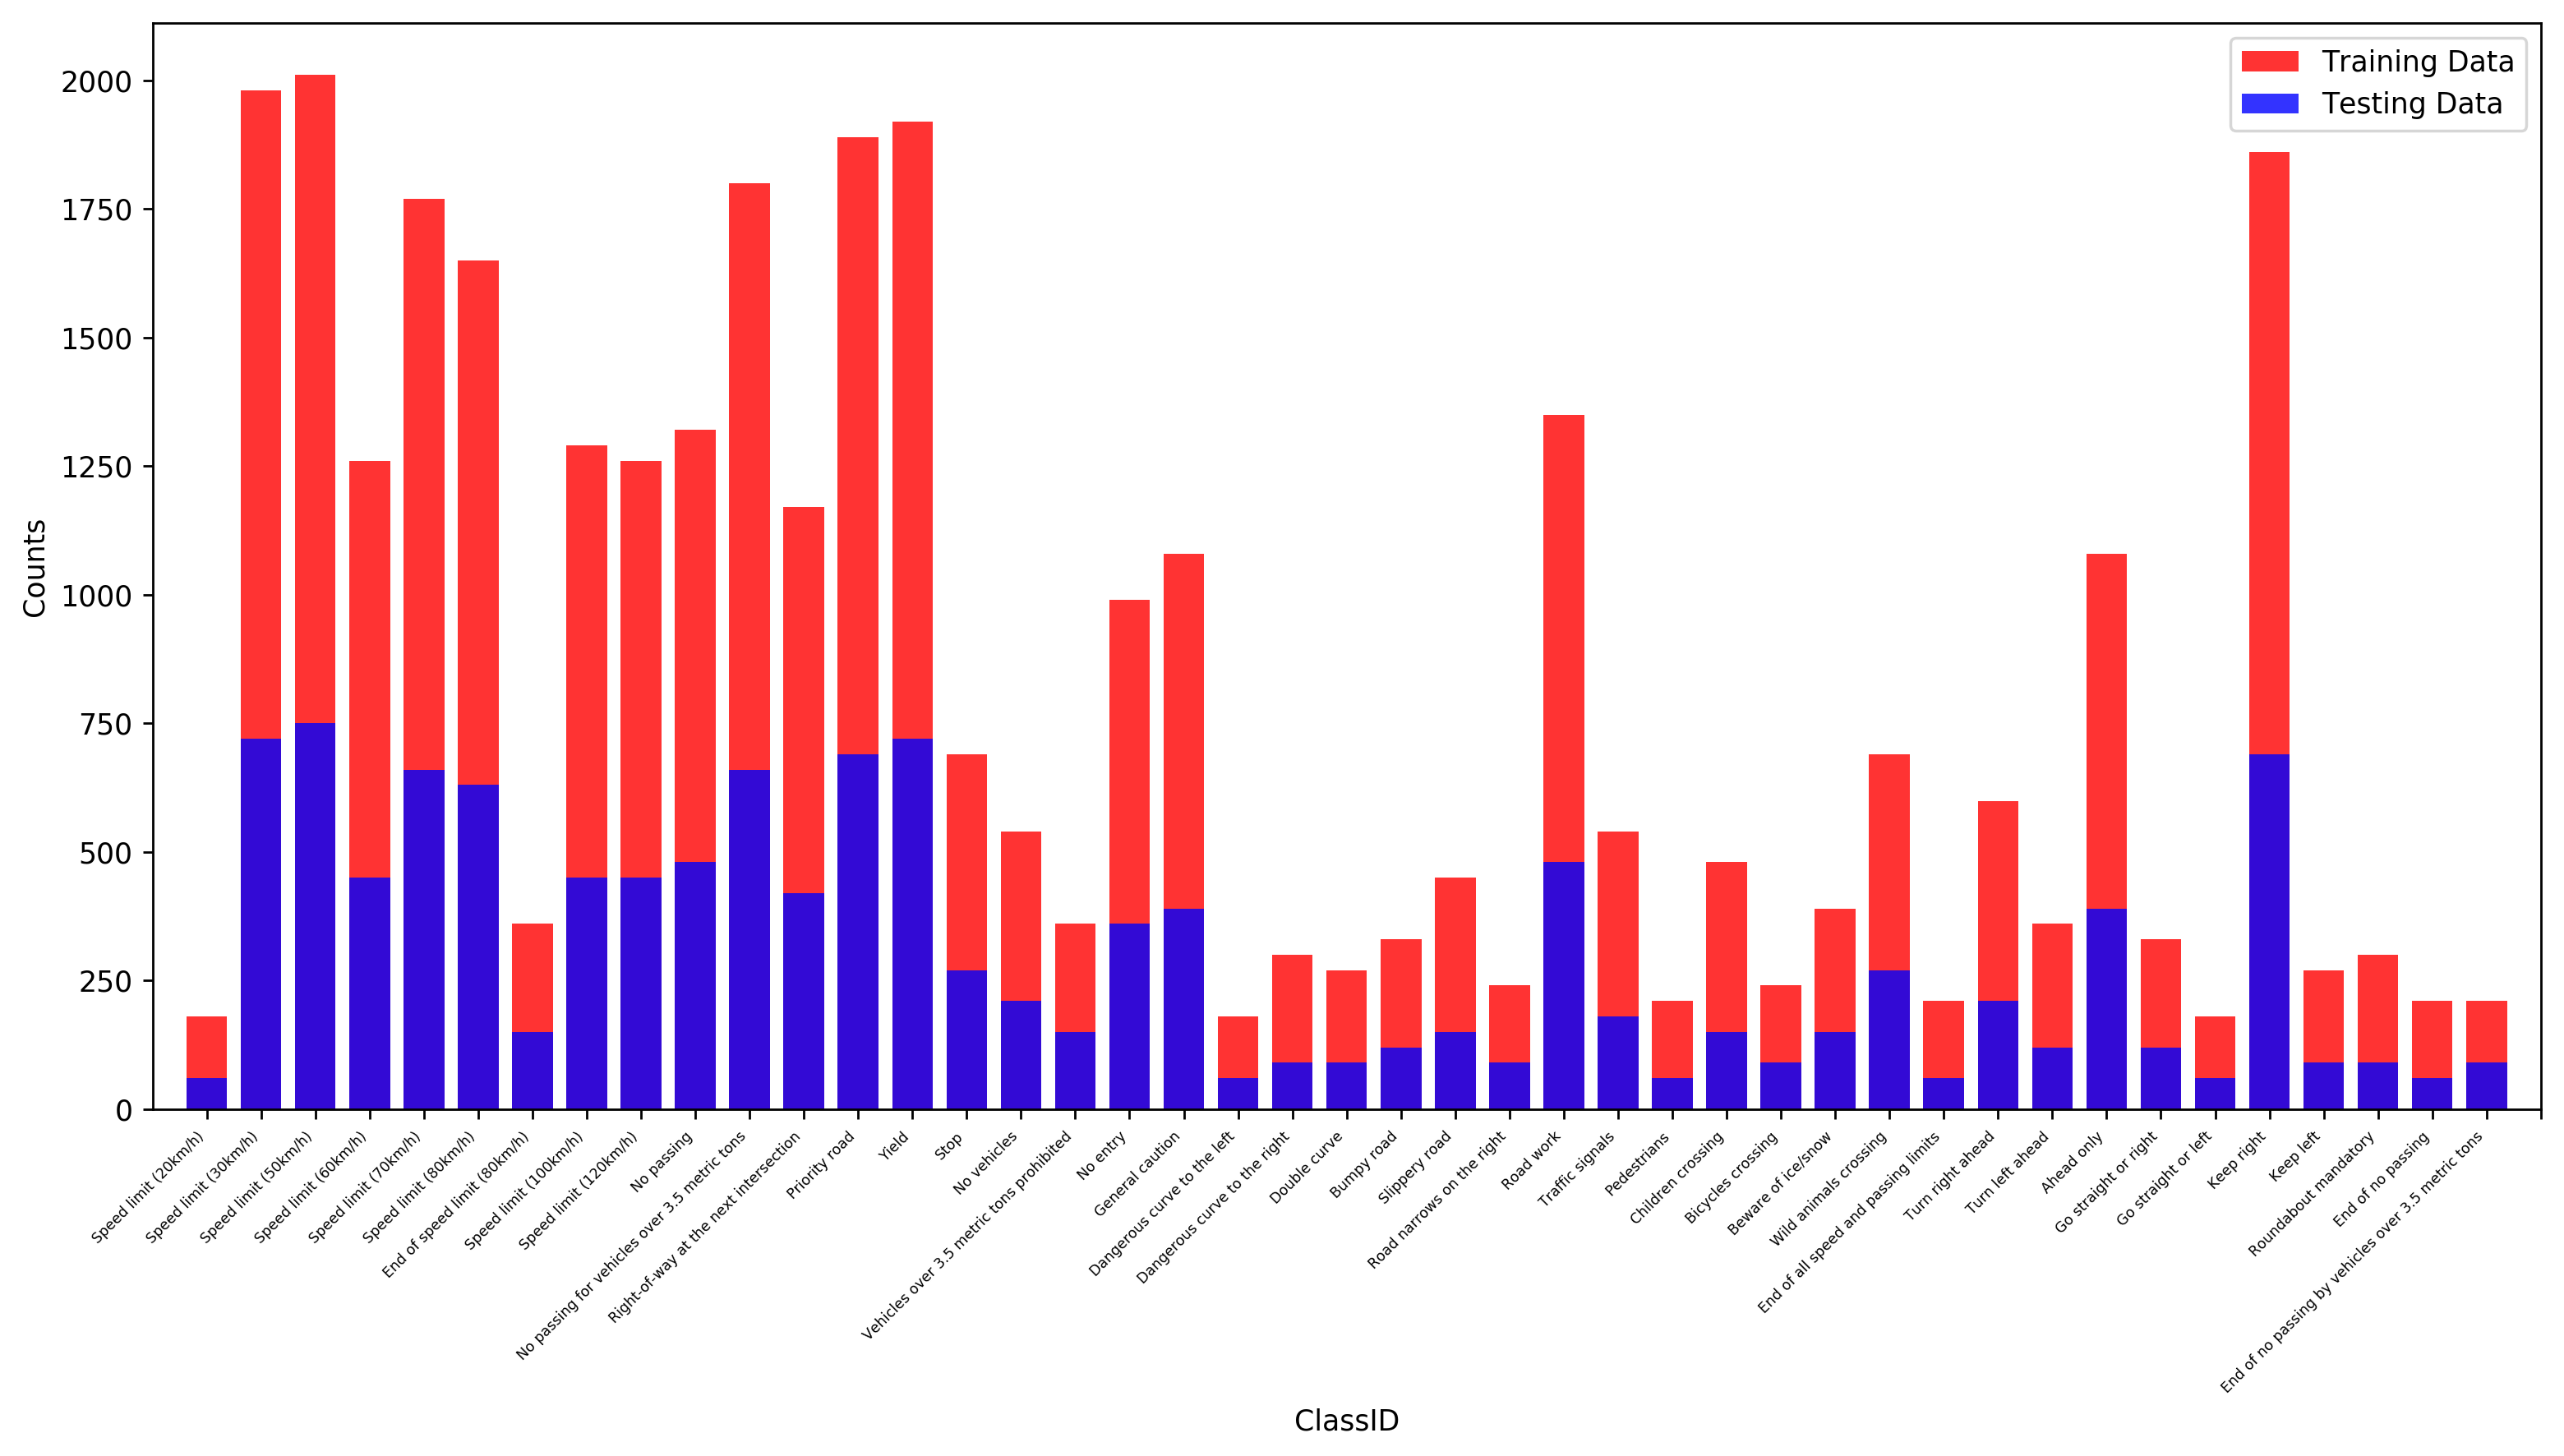

In [12]:
### Relationship between Training and Testing graph
singName = data_pd['SignName'].values
bins = np.linspace(0,43,44)-0.5

# create plot
plt.figure(figsize=(15,7), dpi=250)
bar_width = 0.75
opacity = 0.8 
index = np.arange(n_classes)                # Set the qty of items to be plotted
plt.bar(index, y_train_counts, bar_width,  
        alpha=opacity,          
        align='center',  
        color='r', 
        label='Training Data',)
plt.bar(index, y_test_counts, bar_width,
        alpha=opacity,
        align='center', 
        color='b', 
        label='Testing Data',)
plt.xlabel('ClassID')
plt.ylabel('Counts')
plt.xlim([-1, 43])

plt.xticks(bins+0.5,singName,
           rotation=45,
           fontsize=5,
           ha='right',)

plt.legend()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Normalizing funtions
import cv2

## Normalize data using 255 RGB
def normalizingData(data):
    dataChannel = data.copy().astype(np.float32)              # Assert all data are float-32
    normData = (dataChannel - 128.0)/128.0  
    return normData

## Normalized all images in an array into 255 RGB using normalizingData(data)
def normalizingArray(var):
    return np.array([normalizingData(var[i]) for i in range(len(var))])
    
## Convert a given image into gray scale
def imageToGray(image_data):
    return np.reshape(cv2.cvtColor(image_data, cv2.COLOR_RGB2GRAY), (32, 32, 1))

## Convert all images in an array into gray scale using intoGray(var)
def intoGray(var):
    return np.array([imageToGray(var[i]) for i in range(len(var))])


In [14]:
### Normalizing all images

X_train_normalize = normalizingArray(X_train)
X_test_normalize = normalizingArray(X_test)
X_valid_normalize = normalizingArray(X_valid)

In [15]:
def diplayComparativeImage(originalImage, changedImage):
    numImages = len(originalImage)
    fig = plt.figure(figsize=(5, 5))
    index = int(numImages * random.random())

    axis = fig.add_subplot(1, 2, 1)         
    axis.axis('off')
    axis.text(0, -2, 'original image',
                     fontsize=12, 
                     color='k',
                     )
    axis.imshow(originalImage[index]) 

    axis = fig.add_subplot(1, 2, 2)    # Set axis where the image will be shown
    axis.axis('off')
    axis.text(0, -2, 'change image',
                     fontsize=12, 
                     color='k',
                     )
    axis.imshow(changedImage[index].squeeze())
    plt.show()   

Testing normalised image ...


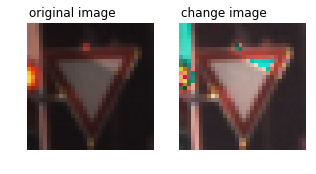

In [16]:
### Visualization of original vs normaloza image

print('Testing normalised image ...')
diplayComparativeImage(X_train, X_train_normalize)

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

## Convert a given image into gray scale
def imageToGray(image_data):
    return np.reshape(cv2.cvtColor(image_data, cv2.COLOR_RGB2GRAY), (32, 32, 1))

## Convert all images in an array into gray scale
def intoGray(var):
    return np.array([imageToGray(var[i]) for i in range(len(var))])


In [18]:
## Converting the given input data sets into gray scale
X_train_nor_gray = intoGray(X_train_normalize)
X_valid_nor_gray = intoGray(X_valid_normalize)
X_test_nor_gray = intoGray(X_test_normalize)

print("Input images")
print("New Train image shape =", X_train_nor_gray.shape[1:])
print("New Valid image shape =", X_valid_nor_gray.shape[1:])
print("New Test image shape =", X_test_nor_gray.shape[1:])

Input images
New Train image shape = (32, 32, 1)
New Valid image shape = (32, 32, 1)
New Test image shape = (32, 32, 1)


Testing normalised gray image ...


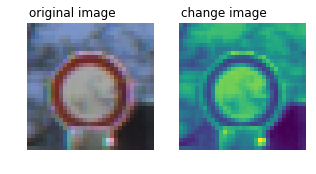

In [19]:
print('Testing normalised gray image ...')

diplayComparativeImage(X_train, X_train_nor_gray)

### Model Architecture

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

chanels = X_train_nor_gray.shape[3]     


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.078
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, chanels, 6), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='fc1_W')
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    #conv1_W_sav.assign(conv1_W)
        
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, chanels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [22]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
### Shufle training data
from sklearn.utils import shuffle
X_train_run, y_train_run = shuffle(X_train_nor_gray, y_train)
X_valid_run = X_valid_nor_gray

In [25]:
%%time

## Parater def.
TARGET_ACCURACY = 0.932
BATCH_SIZE = 192

# Run model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    validation_acc_log = []   # Validation accuracy log
    training_acc_log = []     # Training accuracy log
    
    print("Training...")
    print()
    validation_accuracy = 0.0
    i = 0
    while True: ################# Starting a do-while loop#############################
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_run[offset:end], y_train_run[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_run, y_valid)
        validation_acc_log.append(validation_accuracy)
        
        training_accuracy = evaluate(batch_x, batch_y)
        training_acc_log.append(training_accuracy)        
        
        if i == 0:                                # Print the results from the 1 iteration
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f} \t Validation Accuracy = {:.3f} \n".
                  format(training_accuracy, validation_accuracy))
        elif (i+1)%10 == 0:                             # Print out every 10 iteration
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f} \t Validation Accuracy = {:.3f} \n".
                  format(training_accuracy, validation_accuracy))
        i +=1        
        if validation_accuracy >= TARGET_ACCURACY: 
            print("EPOCH {} ...".format(i+1))     # Print out last iteration
            print("Training Accuracy = {:.3f} \t Validation Accuracy = {:.3f} \n".
                  format(training_accuracy, validation_accuracy))
            print('Done!!')
            break ################# Break out the do-while loop#############################
            
            
    saver.save(sess, './lenet')
    
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.702 	 Validation Accuracy = 0.523 

EPOCH 10 ...
Training Accuracy = 1.000 	 Validation Accuracy = 0.888 

EPOCH 20 ...
Training Accuracy = 1.000 	 Validation Accuracy = 0.899 

EPOCH 30 ...
Training Accuracy = 1.000 	 Validation Accuracy = 0.921 

EPOCH 40 ...
Training Accuracy = 1.000 	 Validation Accuracy = 0.915 

EPOCH 46 ...
Training Accuracy = 1.000 	 Validation Accuracy = 0.939 

Done!!
Model saved
Wall time: 13min 22s


In [26]:
### Calculating the model accuracy
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver_2 = tf.train.import_meta_graph('./lenet.meta')
    saver_2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_nor_gray, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.904


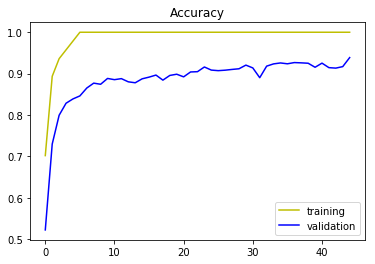

In [27]:
### Plot training and validation trend
plt.plot(np.arange(len(training_acc_log)), training_acc_log, 'y', 
         np.arange(len(validation_acc_log)), validation_acc_log, 'b')
plt.title("Accuracy")
plt.legend(['training', 'validation'])

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

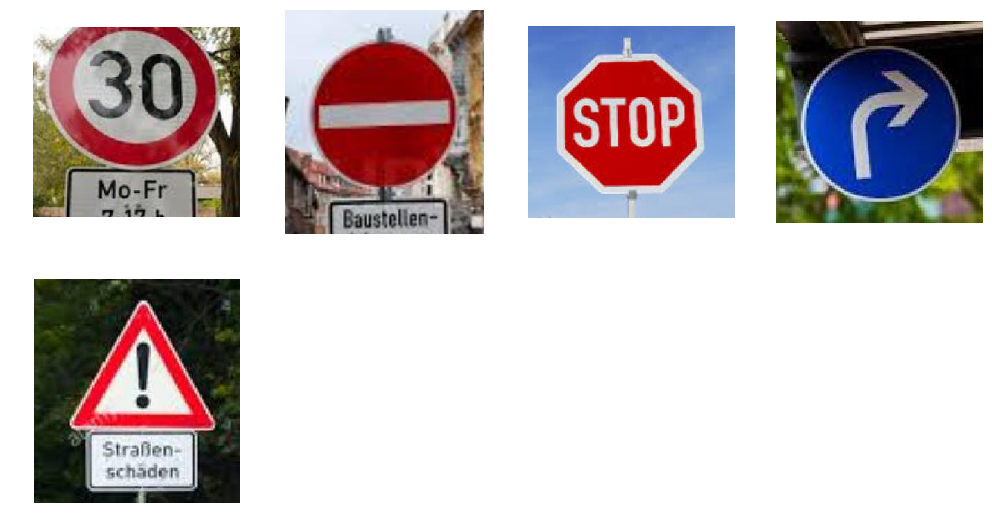

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob, math
import pandas as pd

signNames = pd.read_csv('signnames.csv')               # Read in the images descritic info
inputImages = glob.glob("./new_testing_images/*.jpg")  # Read in the images
numImages = len(inputImages)

newImages = np.zeros((numImages, 32,32,3), dtype=np.uint8)

n_row = math.ceil(math.sqrt(numImages))         # Number of row in the sub-plot grid
n_col = 4                                       # Number of columns in the sub-plot grid
fig_w = 3*n_col                                 # Figure width size in pixels
fig_h = 3*n_row                                 # Figure height size in pixels

fig = plt.figure(figsize=(fig_w + 5, fig_h + 5))     # Set image size

for index, img in enumerate(inputImages):            # Create an iterator for index and image
    image = plt.imread(img)                           
    axis = fig.add_subplot(n_row, n_col, index+1)    # Set axis where the image will be shown
    axis.axis('off')
    axis.imshow(image)
    image = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA)        # resize to 32x32
    newImages[index] = image  # Add resize image to newImage array to be used in incoming cells
plt.show()   
plt.close('all')

In [29]:
### Normalizing the new images
newImages_normalize = normalizingArray(newImages)

print("New input normalize images info.")
print("Image shape = ", newImages_normalize.shape[1:])

New input normalize images info.
Image shape =  (32, 32, 3)


Testing new normalised image ...


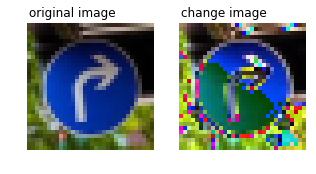

In [30]:
### Visualization of original vs normaloza images

print('Testing new normalised image ...')

diplayComparativeImage(newImages, newImages_normalize)

In [31]:
### Converting new normalized images into gray

newImages_nor_gray = intoGray(newImages_normalize)

print("New input images info")
print("New Train image shape =", newImages_nor_gray.shape[1:])

New input images info
New Train image shape = (32, 32, 1)


Testing new normalised in gray image ...


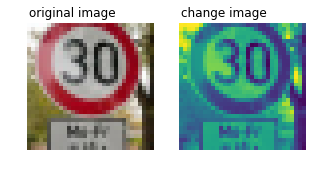

In [32]:
### Visualization of original vs normaloza images

print('Testing new normalised in gray image ...')

diplayComparativeImage(newImages, newImages_nor_gray)

### Predict the Sign Type for Each Image

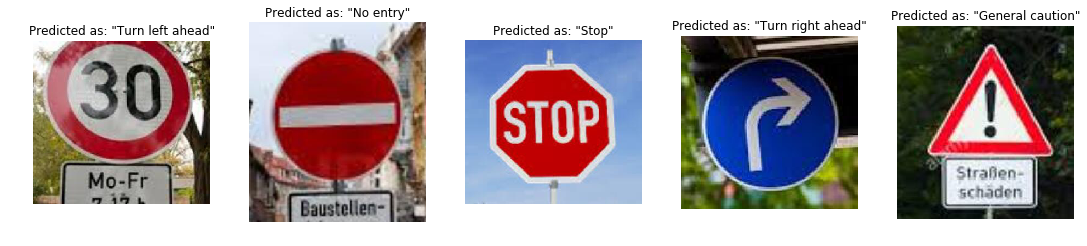

In [33]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


def predictingTop_k(X_data, top_k=1):
    num_examples = len(X_data)
    prediction = np.zeros((num_examples, top_k), dtype=np.int32)  # Prediction array
    probability = np.zeros((num_examples, top_k))                 # Probability array
    
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))      # Upload trained variables
        probability, prediction = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
                                           feed_dict={x:X_data})
    return probability, prediction


    
# Predicting the new image type
probability, prediction = predictingTop_k(newImages_nor_gray)

# show the images with their predicted results
numRow = 1
numCol = 5
numImages = len(newImages_nor_gray)
plt.close('all')

fig, ax = plt.subplots(numRow, numCol, figsize=(15,5))
for index, img in enumerate(inputImages):     
    ax[index].axis('off')
    ax[index].imshow(plt.imread(img))
    ax[index].set_title('Predicted as: "' 
                        + signNames.iloc[prediction[index][0]]['SignName']
                        +'"')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()    
plt.close('all')


### Analyze Performance

In [34]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

matches = np.count_nonzero(probability >= 0.99) # Add the all items with 100% accurate prediction
accuracyPrediction = matches / numImages     # Calculate prediction accuracy

print("The prediction accuracy for these images was: {:3.1f}% ".format(accuracyPrediction * 100))

The prediction accuracy for these images was: 80.0% 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [35]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

predictingTop5 = predictingTop_k(newImages_nor_gray, 5)

In [36]:
### Return the sign name given the class id
def signName(ClassId):
    return signNames.loc[ClassId, 'SignName']                   # Get name funtion

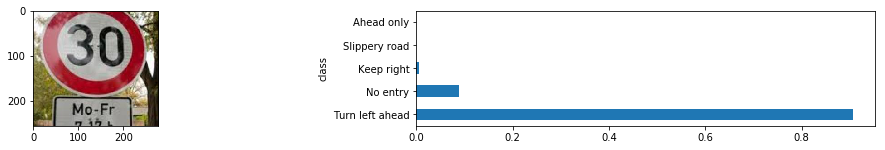

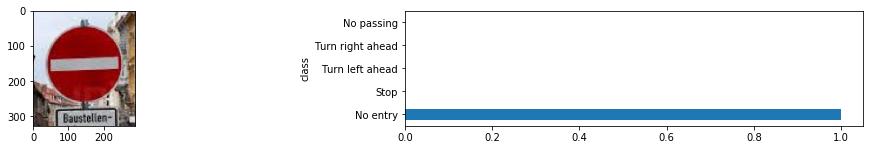

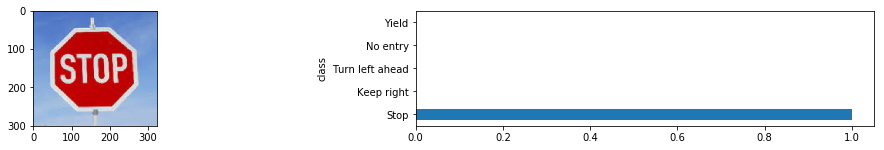

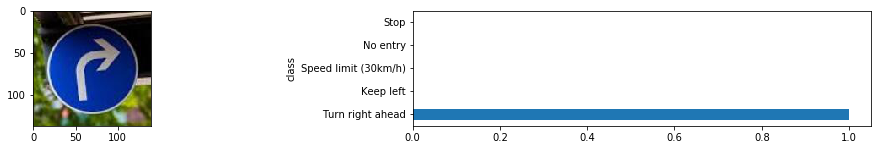

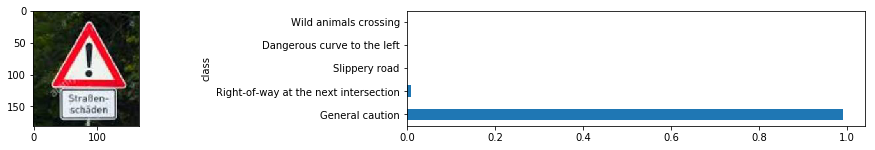

In [37]:
### 

predictedNames = [[signName(classId) for classId in prediction]  # Gets Top 5 predicted names in an array
                  for prediction in predictingTop5[1]]

for img, prediction, signName in zip(inputImages,predictingTop5[0],predictedNames):
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    plt.imshow(plt.imread(img))
    plt.subplot(1,2,2)
    pd.DataFrame({'ps':prediction,'class':signName}).set_index('class').plot(kind='barh',
                                                                   ax=plt.gca(),
                                                                   legend=False,
                                                                   title=None) 
    plt.subplots_adjust(left=0.1, right=1.5, bottom=0.1, top=0.9)
plt.show()    
plt.close('all')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [38]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [39]:
### Random images selecting function
def giveMeAnyImage(imageArray):
    numImages = len(imageArray)
    index = int(numImages * random.random())
    return imageArray[index]    


In [40]:
### Selecting a random images from from the X_test_nor_gray array
image_input = giveMeAnyImage(X_train_run)
image_input.shape

(32, 32, 1)

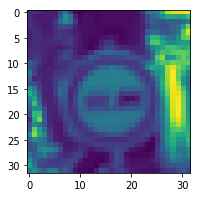

In [41]:
### Show the seleted image
plt.figure(figsize=(3,3))
plt.imshow(image_input.squeeze())

In [42]:
### Reshaping the image to be compatible with the input format of (batch_size, height, width, channels)
### and where the batch_size=1 and the channels=1
image_input = np.reshape(image_input, (1, ) + image_input.shape)
image_input.shape

(1, 32, 32, 1)

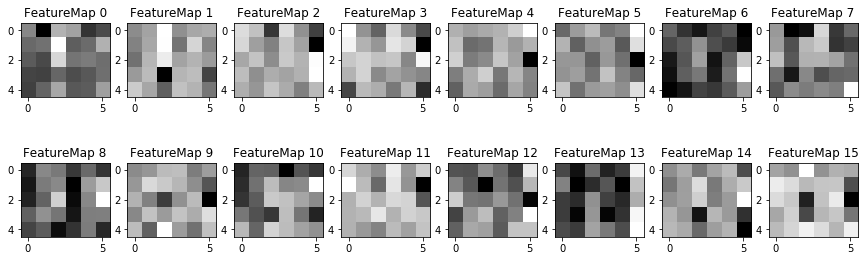

In [43]:
### Visualize the Neural Network's State for Layer 1 and Layer 2

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv_1 = tf.get_default_graph().get_tensor_by_name("conv1_W:0")
    conv_2 = tf.get_default_graph().get_tensor_by_name("conv2_W:0")

    outputFeatureMap(image_input, conv_1)
    outputFeatureMap(image_input, conv_2)
    